In [1]:
# Dependencies; also supporting word cloud by incluing bottom 2 libraries
import os
import csv
import pandas as pd
import requests
import json
import urllib
import numpy as np
from PIL import Image # converting images into arrays
import matplotlib.pyplot as plt # for visualizing the data
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
?WordCloud

In [2]:
# Set path for file
UFO_Sightings = os.path.join('..', 'Data', 'UFO_Sightings_scrubbed.csv')
print(UFO_Sightings)

../Data/UFO_Sightings_scrubbed.csv


In [3]:
# Save path to data set in a variable
UFO_Sightings_datafile = "Data/UFO_Sightings_scrubbed.csv"
print(UFO_Sightings_datafile)

Data/UFO_Sightings_scrubbed.csv


In [4]:
# Use Pandas to read data
UFO_Sightings_datafile = pd.read_csv(UFO_Sightings_datafile)
UFO_Sightings_datafile.head()

/Users/petagaye/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [5]:
# Display a statistical overview of the DataFrame
UFO_Sightings_datafile.describe()

,longitude
count,80332.000000
mean,-86.772885
std,39.697205
min,-176.658056
25%,-112.073333
50%,-87.903611
75%,-78.755000
max,178.441900


In [6]:
# Collecting a list of all columns within the DataFrame
UFO_Sightings_datafile.columns

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude '],
      dtype='object')

In [7]:
# Drop Column, 'duration (hours/min)', 'date posted' to help with Data clean up
UFO_Sightings_datafile = UFO_Sightings_datafile.drop(columns =['duration (hours/min)', 'date posted'])
UFO_Sightings_datafile.head()

,datetime,city,state,country,shape,duration (seconds),comments,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,This event took place in early fall around 194...,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1949 Lackland AFB&#44 TX. Lights racing acros...,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,Green/Orange circular disc over Chester&#44 En...,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,My older brother and twin sister were leaving ...,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,AS a Marine 1st Lt. flying an FJ4B fighter/att...,21.4180556,-157.803611


In [8]:
# Count to see # of data is incomplete
UFO_Sightings_datafile.count()

datetime              80332
city                  80332
state                 74535
country               70662
shape                 78400
duration (seconds)    80332
comments              80317
latitude              80332
longitude             80332
dtype: int64

In [9]:
#To check if there are any missing values in our data frame:
print(UFO_Sightings_datafile.isnull().values.any())

True


In [10]:
#Total number of missing values per column
print(UFO_Sightings_datafile.isnull().sum())

datetime                 0
city                     0
state                 5797
country               9670
shape                 1932
duration (seconds)       0
comments                15
latitude                 0
longitude                0
dtype: int64


In [11]:
UFO_Sightings_scrubbed_datafile = UFO_Sightings_datafile.dropna()
UFO_Sightings_scrubbed_datafile.head(10)


,datetime,city,state,country,shape,duration (seconds),comments,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,This event took place in early fall around 194...,29.8830556,-97.941111
3,10/10/1956 21:00,edna,tx,us,circle,20,My older brother and twin sister were leaving ...,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,AS a Marine 1st Lt. flying an FJ4B fighter/att...,21.4180556,-157.803611
5,10/10/1961 19:00,bristol,tn,us,sphere,300,My father is now 89 my brother 52 the girl wit...,36.5950000,-82.188889
7,10/10/1965 23:45,norwalk,ct,us,disk,1200,A bright orange color changing to reddish colo...,41.1175000,-73.408333
8,10/10/1966 20:00,pell city,al,us,disk,180,Strobe Lighted disk shape object observed clos...,33.5861111,-86.286111
9,10/10/1966 21:00,live oak,fl,us,disk,120,Saucer zaps energy from powerline as my pregna...,30.2947222,-82.984167
10,10/10/1968 13:00,hawthorne,ca,us,circle,300,ROUND &#44 ORANGE &#44 WITH WHAT I WOULD SAY W...,33.9163889,-118.351667
11,10/10/1968 19:00,brevard,nc,us,fireball,180,silent red /orange mass of energy floated by t...,35.2333333,-82.734444
12,10/10/1970 16:00,bellmore,ny,us,disk,1800,silver disc seen by family and neighbors,40.6686111,-73.527500


In [12]:
# Count to see # of data is incomplete
UFO_Sightings_scrubbed_datafile.count()

datetime              66516
city                  66516
state                 66516
country               66516
shape                 66516
duration (seconds)    66516
comments              66516
latitude              66516
longitude             66516
dtype: int64

In [13]:
print(UFO_Sightings_scrubbed_datafile.isnull().sum())

datetime              0
city                  0
state                 0
country               0
shape                 0
duration (seconds)    0
comments              0
latitude              0
longitude             0
dtype: int64


In [14]:
# Reset index
UFO_Sightings_scrubbed_datafile = UFO_Sightings_scrubbed_datafile.reset_index(drop=True)
UFO_Sightings_scrubbed_datafile.head()

,datetime,city,state,country,shape,duration (seconds),comments,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,This event took place in early fall around 194...,29.8830556,-97.941111
1,10/10/1956 21:00,edna,tx,us,circle,20,My older brother and twin sister were leaving ...,28.9783333,-96.645833
2,10/10/1960 20:00,kaneohe,hi,us,light,900,AS a Marine 1st Lt. flying an FJ4B fighter/att...,21.4180556,-157.803611
3,10/10/1961 19:00,bristol,tn,us,sphere,300,My father is now 89 my brother 52 the girl wit...,36.5950000,-82.188889
4,10/10/1965 23:45,norwalk,ct,us,disk,1200,A bright orange color changing to reddish colo...,41.1175000,-73.408333


In [15]:
UFO_Sightings_scrubbed_datafile.to_csv("UFO_Sightings_scrubbedfinal.csv", index=False)

In [16]:
# Load in the dataframe
UFO_Sightings_scrubbedfinal_df = pd.read_csv("UFO_Sightings_scrubbedfinal.csv", index_col=0)
# Looking at first 5 rows of the dataset
UFO_Sightings_scrubbedfinal_df.head(5)

,city,state,country,shape,duration (seconds),comments,latitude,longitude
datetime,,,,,,,,
10/10/1949 20:30,san marcos,tx,us,cylinder,2700.0,This event took place in early fall around 194...,29.883056,-97.941111
10/10/1956 21:00,edna,tx,us,circle,20.0,My older brother and twin sister were leaving ...,28.978333,-96.645833
10/10/1960 20:00,kaneohe,hi,us,light,900.0,AS a Marine 1st Lt. flying an FJ4B fighter/att...,21.418056,-157.803611
10/10/1961 19:00,bristol,tn,us,sphere,300.0,My father is now 89 my brother 52 the girl wit...,36.595000,-82.188889
10/10/1965 23:45,norwalk,ct,us,disk,1200.0,A bright orange color changing to reddish colo...,41.117500,-73.408333


In [17]:
# word cloud on 5 columns & datetime/index column
UFO_Sightings_scrubbedfinal_df[["city", "state","country","shape", "comments"]].head()


,city,state,country,shape,comments
datetime,,,,,
10/10/1949 20:30,san marcos,tx,us,cylinder,This event took place in early fall around 194...
10/10/1956 21:00,edna,tx,us,circle,My older brother and twin sister were leaving ...
10/10/1960 20:00,kaneohe,hi,us,light,AS a Marine 1st Lt. flying an FJ4B fighter/att...
10/10/1961 19:00,bristol,tn,us,sphere,My father is now 89 my brother 52 the girl wit...
10/10/1965 23:45,norwalk,ct,us,disk,A bright orange color changing to reddish colo...


In [18]:
# Groupby by country
country = UFO_Sightings_scrubbedfinal_df.groupby("country")

# Summary statistic of all countries
country.describe().head()

duration (seconds)                                                   \
                     count          mean           std    min    25%    50%   
country                                                                       
au                    10.0    252.500000  2.701157e+02   5.00   37.5  240.0   
ca                  2942.0  29175.344330  1.526537e+06   0.02   20.0  120.0   
gb                    11.0   8343.636364  2.589032e+04  40.00  390.0  600.0   
us                 63553.0   5527.375346  4.065878e+05   0.01   30.0  180.0   

                           latitude             ...                        \
           75%         max    count       mean  ...        75%        max   
country                                         ...                         
au       300.0       900.0     10.0 -28.490281  ... -26.851047 -12.457220   
ca       600.0  82800000.0   2942.0  47.179397  ...  49.783333  72.700000   
gb       900.0     86400.0     11.0  52.595202  ...  53.625000  56.500000   
us       600.0  66276000.0  63553.0  38.323067  ...  41.900000  70.636944   

        longitude                                                              \
             count        mean        std         min         25%         50%   
country                                                                         
au            10.0  136.206789  12.755827  115.861397  130.836639  138.532650   
ca          2942.0  -90.269254  20.823064 -138.666667 -113.500000  -79.833333   
gb            11.0   -2.335252   1.487106   -3.833333   -3.050000   -2.933333   
us         63553.0  -95.578241  18.061096 -176.658056 -114.362778  -89.985833   

                                 
                75%         max  
country                          
au       143.372227  153.099533  
ca       -76.483333  -52.666667  
gb        -2.360556    1.350000  
us       -80.912222  -65.831667  

[4 rows x 24 columns]

In [19]:
# Checking to see whether there are any null values
UFO_Sightings_scrubbedfinal_df.isna().sum()

city                  0
state                 0
country               0
shape                 0
duration (seconds)    0
comments              0
latitude              0
longitude             0
dtype: int64

In [65]:
text = " ".join(com.split()[0] for com in UFO_Sightings_scrubbedfinal_df.comments)
word_cloud = WordCloud(collocations = False, background_color = 'gray', max_font_size=50).generate(text)

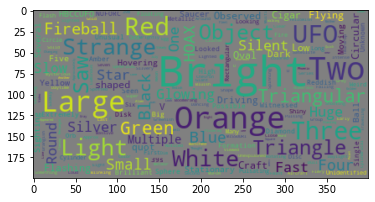

In [68]:
plt.imshow(word_cloud, interpolation='bilinear')

wordcloud_spa = WordCloud(max_font_size=100, max_words=1000, background_color="white").generate(text)

plt.figure #(figsize=[10,10])
plt.axis("on")
plt.show()



In [70]:
# Saved word cloud file
word_cloud.to_file("word_cloud_first_review.png")